In [22]:
import numpy as np 
import matplotlib.pyplot as plt 

### Сгенеруйте выборку объёму n = 100 для некоторого значения парамeтра $\theta$.

In [41]:
theta = 3
a = 0.05

def func1(x, theta):
    return (1 - x) ** (1 / (1 - theta))

N = 100

np.random.seed(42)

X = [func1(x, theta) for x in np.random.sample(N)]
X.sort()

### d) Вычислите указанные выше доверительные интегралы для доверительной веротяности 0.95.

#### Доверительный интервал для медианы

In [42]:
theta_estimate = N / np.sum(np.log(X)) + 1

lower_border1 = (-(1.96 * np.log(2) * (2 ** (1 / (theta_estimate - 1)))) / (theta_estimate - 1) / 10 + 2 ** (1 / (theta_estimate -1)))
upper_border1 = (1.96 * np.log(2) * (2 ** (1 / (theta_estimate - 1)))) / (theta_estimate - 1) / 10 + 2 ** (1 / (theta_estimate -1))

print(f"Доверительный интервал: ({lower_border1}, {upper_border1}), длина: {upper_border1 - lower_border1}")

Доверительный интервал: (1.287723199859717, 1.4583574933745918), длина: 0.1706342935148748


#### Асимптотический доверительный интервал

In [43]:
lower_border2 = -1.96 * (theta_estimate - 1) / np.sqrt(N) + theta_estimate
upper_border2 = 1.96 * (theta_estimate - 1) / np.sqrt(N) + theta_estimate

print(f"Доверительный интервал: ({lower_border2}, {upper_border2}), длина: {upper_border2 - lower_border2}")

Доверительный интервал: (2.757861106419567, 3.6149277155196544), длина: 0.8570666091000874


#### Бутстраповский параметрический доверительный интервал

In [44]:
def func2(X, N):
    return 1 + N / sum([np.log(x) for x in X])

M = np.sort(np.array([func2([func1(x, theta) for x in np.random.sample(N)], N) for i in range(50000)]))

lower_border3 = M[int(a / 2 * 50000)]
upper_border3 = M[int((1 - a / 2) * 50000)]

print(f"Доверительный интервал: ({lower_border3}, {upper_border3}), длина: {upper_border3 - lower_border3}")

Доверительный интервал: (2.659065105749759, 3.457153041895431), длина: 0.7980879361456719


#### Бутстраповский непараметрический доверительный интервал

In [45]:
M = np.array([])

for i in range(1000):
    M = np.append(M, N / np.sum(np.log((np.random.choice(X, size = len(X))))) + 1 - theta_estimate)

M = np.sort(M)

lower_border4 = round(theta_estimate + M[74], 3)
upper_border4 = theta_estimate + M[974]

print(f"Доверительный интервал: ({lower_border4}, {upper_border4}), длина: {upper_border4 - lower_border4}")

Доверительный интервал: (2.92, 3.71398285022294), длина: 0.7939828502229402


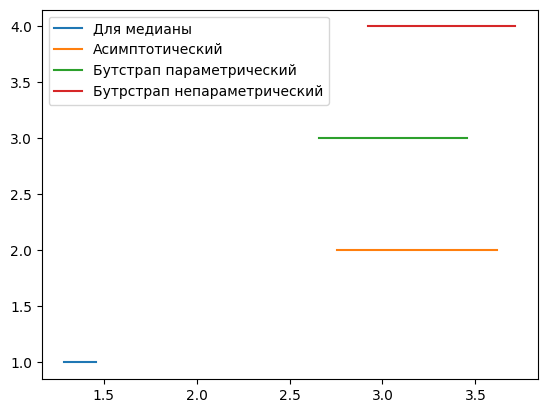

In [46]:
x1 = np.linspace(lower_border1, upper_border1, 100)
y1 = [1] * 100

x2 = np.linspace(lower_border2, upper_border2, 100)
y2 = [2] * 100

x3 = np.linspace(lower_border3, upper_border3, 100)
y3 = [3] * 100

x4 = np.linspace(lower_border4, upper_border4, 100)
y4 = [4] * 100

plt.plot(x1, y1)
plt.plot(x2, y2)
plt.plot(x3, y3)
plt.plot(x4, y4)

plt.legend(["Для медианы", "Асимптотический", "Бутстрап параметрический", "Бутрстрап непараметрический"])